In [5]:
import json
import glob
import re
import matplotlib.pyplot as plt
import numpy as np

In [14]:
filepath = "../logs/run{}_bee_totalnodes:2.json"
num_runs = 3

train_accs = []
test_accs = []
epochs = None 

for run in range(1, num_runs + 1):
    with open(filepath.format(run), "r") as f:
        data = json.load(f)
    
    run_train_acc = [d["acc"] for d in data if d["mode"] == "train"]
    run_test_acc = [d["acc"] for d in data if d["mode"] == "test"]
    
    if epochs is None:
        train_epochs = [d["epoch"] for d in data if d["mode"] == "train"]
        test_epochs = [d["epoch"] for d in data if d["mode"] == "test"]
    
    train_accs.append(run_train_acc)
    test_accs.append(run_test_acc)

train_accs = np.array(train_accs)
test_accs = np.array(test_accs)

train_mean = train_accs.mean(axis=0)
train_std = train_accs.std(axis=0)

test_mean = test_accs.mean(axis=0)
test_std = test_accs.std(axis=0)



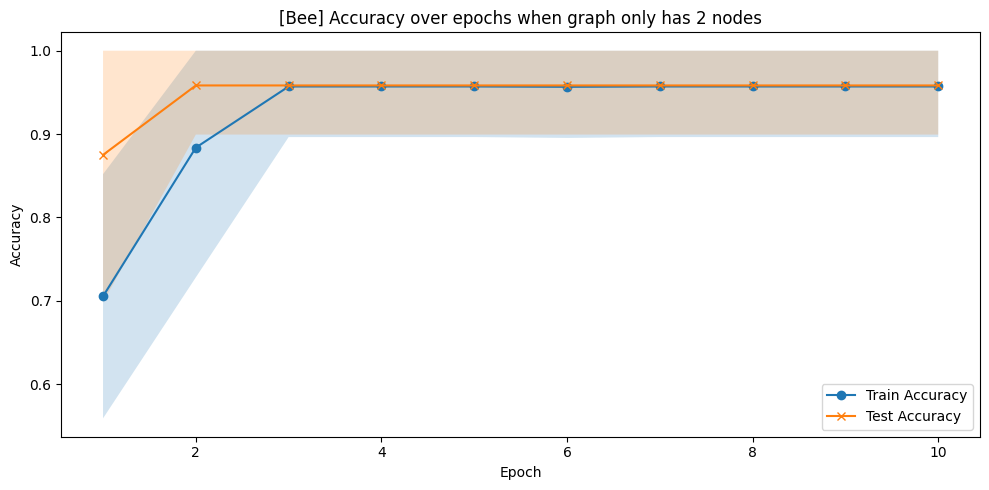

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(train_epochs, train_mean, label="Train Accuracy", marker='o')
plt.fill_between(train_epochs,
                 np.clip(train_mean - train_std, 0, 1),
                 np.clip(train_mean + train_std, 0, 1),
                 alpha=0.2)

plt.plot(test_epochs, test_mean, label="Test Accuracy", marker='x')
plt.fill_between(test_epochs,
                 np.clip(test_mean - test_std, 0, 1),
                 np.clip(test_mean + test_std, 0, 1),
                 alpha=0.2)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("[Bee] Accuracy over epochs when graph only has 2 nodes")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
filepath = "../logs/run{}_bee_totalnodes:10.json"
num_runs = 3

train_accs = []
test_accs = []
epochs = None 

for run in range(1, num_runs + 1):
    with open(filepath.format(run), "r") as f:
        data = json.load(f)
    
    run_train_acc = [d["acc"] for d in data if d["mode"] == "train"]
    run_test_acc = [d["acc"] for d in data if d["mode"] == "test"]
    
    if epochs is None:
        train_epochs = [d["epoch"] for d in data if d["mode"] == "train"]
        test_epochs = [d["epoch"] for d in data if d["mode"] == "test"]
    
    train_accs.append(run_train_acc)
    test_accs.append(run_test_acc)

train_accs = np.array(train_accs)
test_accs = np.array(test_accs)

train_mean = train_accs.mean(axis=0)
train_std = train_accs.std(axis=0)

test_mean = test_accs.mean(axis=0)
test_std = test_accs.std(axis=0)

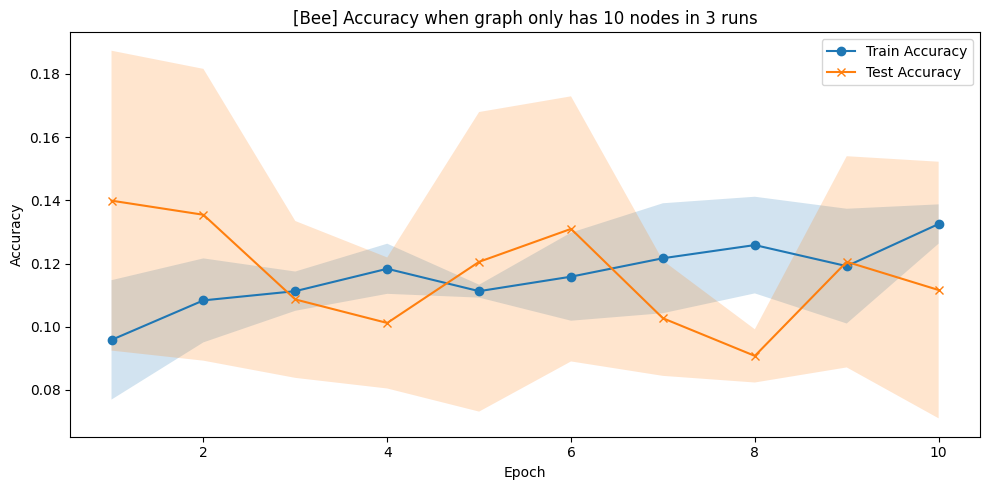

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(train_epochs, train_mean, label="Train Accuracy", marker='o')
plt.fill_between(train_epochs, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(test_epochs, test_mean, label="Test Accuracy", marker='x')
plt.fill_between(test_epochs, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("[Bee] Accuracy when graph only has 10 nodes in 3 runs")
plt.legend()
plt.tight_layout()
plt.show()

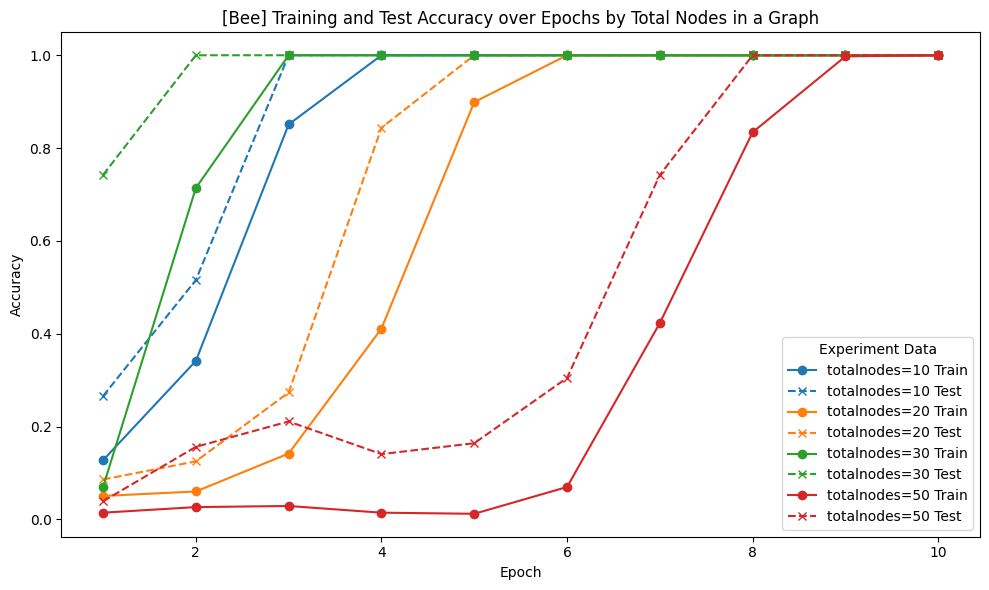

In [2]:
file_pattern = "../logs/sparse_run1_bee_totalnodes:*.json"
num_of_nodes = {10, 20, 30, 50}

files = glob.glob(file_pattern)
if not files:
    print(f"No files found matching the pattern: {file_pattern}")

data_by_nodes = {}

for file in files:
    match = re.search(r'totalnodes:(\d+)', file)
    if not match:
        print(f"Skipping file '{file}': Does not match expected naming pattern.")
        continue
    totalnodes = int(match.group(1))
    
    if num_of_nodes is not None and totalnodes not in num_of_nodes:
        print(f"Skipping file '{file}': totalnodes {totalnodes}.")
        continue

    try:
        with open(file, 'r') as f:
            data = json.load(f)
    except Exception as e:
        print(f"Error reading file '{file}': {e}")
        continue

    train_epochs, train_accs = [], []
    test_epochs, test_accs = [], []
    for entry in data:
        mode = entry.get("mode")
        if mode == "train":
            train_epochs.append(entry.get("epoch"))
            train_accs.append(entry.get("acc"))
        elif mode == "test":
            test_epochs.append(entry.get("epoch"))
            test_accs.append(entry.get("acc"))
    
    if train_epochs and train_accs:
        if totalnodes not in data_by_nodes:
            data_by_nodes[totalnodes] = {}
        data_by_nodes[totalnodes]["train"] = (train_epochs, train_accs)
    else:
        print(f"No training data found in file '{file}'.")

    if test_epochs and test_accs:
        if totalnodes not in data_by_nodes:
            data_by_nodes[totalnodes] = {}
        data_by_nodes[totalnodes]["test"] = (test_epochs, test_accs)
    else:
        print(f"No test data found in file '{file}'.")

if not data_by_nodes:
    print("No valid data loaded from files.")
else:
    plt.figure(figsize=(10, 6))
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    sorted_totalnodes = sorted(data_by_nodes.keys())
    
    for i, totalnodes in enumerate(sorted_totalnodes):
        color = colors[i % len(colors)]
        
        if "train" in data_by_nodes[totalnodes]:
            epochs_train, accs_train = data_by_nodes[totalnodes]["train"]
            plt.plot(epochs_train, accs_train, marker='o', linestyle='-', 
                     label=f"totalnodes={totalnodes} Train", color=color)
        
        if "test" in data_by_nodes[totalnodes]:
            epochs_test, accs_test = data_by_nodes[totalnodes]["test"]
            plt.plot(epochs_test, accs_test, marker='x', linestyle='--', 
                     label=f"totalnodes={totalnodes} Test", color=color)
    
    plt.title("[Bee] Training and Test Accuracy over Epochs by Total Nodes in a Graph")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(title="Experiment Data")
    plt.tight_layout()
    plt.show()